In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Problem Statement
The data scientists at BigMart have collected **2013 sales data** for **1559 products** across **10 stores** in **different cities**. Also, certain attributes of each product and store have been defined. The aim is to **build a predictive model** and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


Please note that the **data may have missing values** as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

![](https://media.giphy.com/media/VTXzh4qtahZS/giphy.gif)

## Data
We have a train (8523 observations) and test (5681 observations) dataset, the train data set has both input and output variable(s). We need to predict the sales for the test dataset.


|Variable|Description|
|---|---|
|Item_Identifier|Unique Product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visability|The % of the total display area of all products in a store allocated to the particular product|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in a particular store. This is the outcome variable to be predicted.|

## Plan of attack
We'll explore the problem using the following steps:
1. **Hypothesis Generation**: Understand the problem by brainstorming ideas about how the outcome can be affected by possible factors
	* Store level hypothesis
	* Product level hypothesis
2. **Data Exploration**: Look at the categorical and continuous features and make inferences about the data
3. **Data Cleaning**: Check the data for missing and incorrect values, outliers. Think about strategies on how to deal with these observations.
4. **Feature Engineering (Optional)**: Modify the existing variables and create new ones
5. **Modelling**: Make predictive models on the data. Try to create a reusable pipeline for all the models.
	* Linear Regression
	* Decision Tree
	* Random Forest
	* SVR (Support Vector Regreesion)
	* XGBoost

## Additional Notes
* Combine the two datasets to do all the needed data preprocessing. After applying all the preprocessing, split the datasets again.
* Compare the model results using metrics and visualization graphics.


In [0]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
%matplotlib inline

In [0]:
SEED = 42
np.random.seed(SEED)

### 1. Hypothesis Generation
#### Store Level Hypothesis
✅ - We have data about these hypothesis.
* **<span style="color:Green">Place</span>**: Stores in the urban places will have higher sales because there are more people in the urban areas rather than in the villages. ✅
* **<span style="color:red">Population</span>**: Stores placed in locations with higher population will generate higher sales because of the demand.
* **<span style="color:red">Feedback</span>**: Stores with more positive feedback, will have higher sales because of the comfortable environment and the kind employees.
* **<span style="color:red">Competitors</span>**: Stores which have competitors nearby will generate lower sales because of more competition.
* **<span style="color:red">Marketing</span>**: Stores which have good advertising (TV ads and paper catalogs) will generate higher sales.
* **<span style="color:Green">Location</span>**: Stores which are in more famous locations will generate higher sales. ✅
* **<span style="color:Green">Store Capacity</span>**: Stores with higher capacity will generate higher sales because they will have a diverse range of products and many product units. ✅
* **<span style="color:red">Work Hours</span>**: Stores which have longer working hours will generate higher sales.
* **<span style="color:red">Payment Types</span>**: Stores which are offering many types of payment will generate higher sales.
* **<span style="color:red">Place of payment</span>**: Stores which are offering some kind of recompense if the client is waiting too much will generate higher sales.
* **<span style="color:red">Toys for Kids</span>**: Stores which are offering some types of free toys for the kids when you spent a certain amount of money will generate higher sales.
* **<span style="color:red">Mobile App</span>**: Stores which have a mobile application will generate higher sales because of the convenient to look at the weekly offers.
* **<span style="color:red">Product Returns</span>**: Stores which are offering product returns will generate higher sales because of the emotional sense of loyalty.
* **<span style="color:red">Shopping Type</span>** Stores which are offering online shopping will generate higher sales because of the customers' saved time and convenience.
* **<span style="color:red">Data Analysis, ML</span>**: Stores which are using data analysis and machine learning on their historical data will generate higher sales. 😃
* **<span style="color:red">Demographics</span>**: Based on race, some races can generate higher sales
* **<span style="color:red">Income</span>**: Based on the income, people with higher income can generate higher sales
* **<span style="color:red">Political Vision</span>**: People with are with conservative political vision maybe will generate higher sales 
* **<span style="color:red">Weather</span>**: Based on the weather conditions people can generate higher sales

#### Product Level Hypothesis
* **<span style="color:Green">Visibility</span>**: Better-placed products will generate higher sales because more people are looking at them, so there is a high chance to buy some of them. ✅
* **<span style="color:Green">Product Diversity</span>**: Stores which are selling many types of products (supermarkets) will have higher sales because people will buy many products of them. ✅
* **<span style="color:red">Promotions</span>**: Products which have a promotion will generate higher sales.
* **<span style="color:red">Quality</span>**: Products with higher quality will generate higher sales.
* **<span style="color:red">Brand</span>**: Branded products will generate higher sales because of the trust in the customers.
* **<span style="color:Green">Daily Products</span>**: Stores which are offering daily-used products will generate higher sales because of the high demand. ✅
* **<span style="color:red">Bioproducts</span>** Stores which are offering bioproducts will generate higher sales because people want to be healthy.
* **<span style="color:Green">Price</span>**: Products which have lower prices will generate higher sales. ✅
* **<span style="color:red">Expiration Date of Product</span>**: If the product expiration date is going to expire in 2-3 days are the people going to take this product?

|Variable|Description|Relation to Hypothesis|
|---|---|---|
|Item_Identifier|Unique Product ID|ID Variable|
|Item_Weight|Weight of product|Not considered in hypothesis|
|Item_Fat_Content|Whether the product is low fat or not|Linked to "Daily Products" hypothesis. Low-fat products are used more.|
|Item_Visability|The % of the total display area of all products in a store allocated to the particular product|Linked to "Visibility" hypothesis.|
|Item_Type|The category to which the product belongs|Linked to "Product Diversity" hypothesis|
|Item_MRP|Maximum Retail Price (list price) of the product|Linked to "Price" hypothesis|
|Outlet_Identifier|Unique store ID|ID Variable|
|Outlet_Establishment_Year|The year in which store was established|Not considered in hypothesis|
|Outlet_Size|The size of the store in terms of ground area covered|Considered in the "Store Capacity" hypothesis|
|Outlet_Location_Type|The type of city in which the store is located|Considered in "Location" hypothesis|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|Considered in the "Supermarket" hypothesis|
|Item_Outlet_Sales|Sales of the product in a particular store. This is the outcome variable to be predicted.|Outcome Variable|

### Part 2: Exploratory Data Analysis

In [5]:
# data = pd.read_csv("Train_Data.csv")
data = pd.read_csv("drive/My Drive/ML Data Playground/Bigmart_Sales_Train_Data.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Let's look at a consice summary about the data. Here, we can see the column types and missing data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


We can see that there are missing values for the **Item_Weight** and **Outlet_Size** columns. **Item_outlet_Sales** also have missing values, but this is because there are no values in the test set.

Now, let's look at some basic statistics about the numeric columns using the "describe" function.

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* We don't know the currency for the Item_MRP column, but we suspect that it's India rupee. Maybe, this is the site: https://www.bigmartretail.com/. 
* Later, we can use the **Outlet_Establishemnt_Year** to calculate the duration (in months or years) from the establishment.

In [8]:
data[["Item_Type", "Item_MRP"]].sort_values("Item_MRP")

,Item_Type,Item_MRP
153,Soft Drinks,31.2900
6958,Soft Drinks,31.4900
2135,Soft Drinks,31.8900
2011,Breads,31.9558
2242,Frozen Foods,31.9558
5341,Frozen Foods,32.0558
8038,Soft Drinks,32.0900
1209,Snack Foods,32.3558
2711,Household,32.4558
4304,Soft Drinks,32.4900


Later, we can use pivot tables to look at the summary statistics about the different item types.

In [9]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [11]:
selected_data = data[["Item_Type", "Item_MRP", "Item_Identifier"]]
pivot_data = pd.pivot_table(selected_data, 
                            values = "Item_MRP",
                            index = data.index.values,
                            columns = ["Item_Type"],
                            aggfunc = np.sum)
pivot_data.describe()

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,648.000000,251.000000,110.000000,649.000000,682.000000,856.000000,1232.000000,214.000000,520.000000,910.000000,425.000000,169.000000,64.000000,1200.000000,445.000000,148.000000
mean,126.380766,140.952669,141.788151,139.763832,148.499208,138.503366,144.581235,137.077928,130.818921,149.424753,139.882032,132.851430,141.841719,146.194934,131.492506,147.838023
std,58.059573,63.499685,58.457031,60.811624,70.326744,67.455074,60.475899,62.023378,59.379481,62.394009,58.117456,58.684694,58.622816,58.898002,60.752561,69.293224
min,33.987400,31.955800,40.048000,36.350600,33.487400,31.955800,36.250600,34.253200,33.121600,32.455800,34.753200,35.019000,33.721600,32.355800,31.290000,34.053200
25%,84.067750,91.314600,99.860800,89.880400,88.827050,83.699350,98.391000,106.318800,95.391650,107.762200,98.304200,84.090800,109.209600,104.345750,82.427600,90.692200
50%,112.354400,129.131000,155.363000,140.149600,147.540500,128.649400,145.544400,144.944400,128.034900,153.318200,146.573400,130.928400,158.560400,146.673400,144.010200,166.934200
75%,170.992200,194.729400,178.312000,184.592400,213.371800,190.584600,188.479300,177.684400,163.851300,191.599750,185.260800,180.366000,184.708200,185.825300,176.205400,205.488800
max,265.556800,263.659400,234.930000,266.888400,266.688400,264.891000,264.225200,261.427800,266.688400,264.791000,261.593600,254.904000,240.288000,264.956800,263.591000,263.025200


In [12]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [14]:
data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [15]:
data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [16]:
data.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [17]:
data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [18]:
data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
result = pd.crosstab(data['Outlet_Identifier'], data['Outlet_Size'].fillna('n/a'))
result

Outlet_Size,High,Medium,Small,n/a
Outlet_Identifier,,,,
OUT010,0,0,0,555
OUT013,932,0,0,0
OUT017,0,0,0,926
OUT018,0,928,0,0
OUT019,0,0,528,0
OUT027,0,935,0,0
OUT035,0,0,930,0
OUT045,0,0,0,929
OUT046,0,0,930,0


In [20]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
data.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
0.112203      2
0.044024      2
0.072253      2
0.061271      2
0.061164      2
0.145266      2
0.081097      2
0.071958      2
0.103442      2
0.074613      2
0.072655      2
0.071833      2
0.136286      2
0.041355      2
0.026950      2
0.013952      2
0.160624      2
0.080640      2
0.097611      2
0.096592      2
           ... 
0.100641      1
0.122735      1
0.099024      1
0.054600      1
0.118859      1
0.162572      1
0.076745      1
0.015461      1
0.057655      1
0.042113      1
0.029565      1
0.066447      1
0.035954      1
0.083222      1
0.021413      1
0.030921      1
0.081119      1
0.052811      1
0.118080      1
0.046654      1
0.021469      1
0.060134      1
0.096658      1
0.019064      1
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, L

In [22]:
sum(data['Item_Visibility'] == 0) / len(data)

0.0617153584418632

In [23]:
data['Item_Visibility'].replace(0.00000, np.nan, inplace = True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Creating a Dataset without missing values

In [0]:
no_null_data = data.dropna(subset = ['Item_Weight', 'Outlet_Size', 'Item_Visibility'])

In [25]:
no_null_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4358.000000,4358.000000,4358.000000,4358.000000,4358.000000
mean,12.922243,0.064768,141.890269,1999.182653,2275.359278
std,4.677118,0.043123,62.407114,7.379086,1502.360095
min,4.555000,0.003589,31.490000,1987.000000,69.243200
25%,8.771250,0.030267,94.658100,1997.000000,1125.368450
50%,12.650000,0.054496,143.132500,1999.000000,1947.797900
75%,17.000000,0.091912,186.698350,2004.000000,3108.953100
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


In [26]:
no_null_data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [27]:
len(no_null_data), len(data)

(4358, 8523)

### Cleaning the Data
In this section, we'll look for missing values, and outliers and maybe remove or replace some of them.

In [28]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [29]:
for item_type in data.Item_Type.unique():
    condition = data["Item_Type"] == item_type
    mean_item_weight = data.loc[condition, 'Item_Weight'].mean()
    data.loc[condition, 'Item_Weight'] = data.loc[condition, 'Item_Weight'].fillna(mean_item_weight)
    print("Item Type: " + str(item_type) + ", Mean Item Weight: " + str(mean_item_weight))

Item Type: Dairy, Mean Item Weight: 13.42606890459367
Item Type: Soft Drinks, Mean Item Weight: 11.847459893048129
Item Type: Meat, Mean Item Weight: 12.81734421364986
Item Type: Fruits and Vegetables, Mean Item Weight: 13.224769381746881
Item Type: Household, Mean Item Weight: 13.384736495388726
Item Type: Baking Goods, Mean Item Weight: 12.277108208955255
Item Type: Snack Foods, Mean Item Weight: 12.987879554655919
Item Type: Frozen Foods, Mean Item Weight: 12.867061281337076
Item Type: Breakfast, Mean Item Weight: 12.768202247191002
Item Type: Health and Hygiene, Mean Item Weight: 13.142313953488392
Item Type: Hard Drinks, Mean Item Weight: 11.400327868852452
Item Type: Canned, Mean Item Weight: 12.305705009276451
Item Type: Breads, Mean Item Weight: 11.3469362745098
Item Type: Starchy Foods, Mean Item Weight: 13.690730769230765
Item Type: Others, Mean Item Weight: 13.853284671532842
Item Type: Seafood, Mean Item Weight: 12.5528431372549


In [30]:
# data.Item_Visibility.value_counts()
data[data.Item_Visibility.isnull()]
data.Outlet_Identifier.unique()

# Средното на тази категория за този магазин
# Ако нямаме Item_Visibility за тази категория, средното Item_Visibility за всички продукти в магазина

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [0]:
for index, row in data[data.Item_Visibility.isnull()].iterrows():
    conditions = (data["Item_Type"] == row["Item_Type"]) & (data["Outlet_Identifier"] == row["Outlet_Identifier"])
    mean_item_visibility = data.loc[conditions, "Item_Visibility"].mean()
    data.loc[conditions, "Item_Visibility"] = data.loc[conditions, "Item_Visibility"].fillna(mean_item_visibility)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [33]:
# data.Outlet_Size.value_counts()
data.groupby(["Outlet_Identifier", "Outlet_Size"]).count()

,,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Identifier,Outlet_Size,,,,,,,,,,
OUT013,High,932,932,932,932,932,932,932,932,932,932
OUT018,Medium,928,928,928,928,928,928,928,928,928,928
OUT019,Small,528,528,528,528,528,528,528,528,528,528
OUT027,Medium,935,935,935,935,935,935,935,935,935,935
OUT035,Small,930,930,930,930,930,930,930,930,930,930
OUT046,Small,930,930,930,930,930,930,930,930,930,930
OUT049,Medium,930,930,930,930,930,930,930,930,930,930


In [34]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [0]:
data["Item_Fat_Content"].replace({"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"}, inplace = True)

In [36]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [37]:
result = pd.crosstab(data["Item_Fat_Content"], data["Item_Type"])
result

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,,,,
Low Fat,329,140,41,341,418,450,630,214,520,910,170,169,37,692,374,82
Regular,319,111,69,308,264,406,602,0,0,0,255,0,27,508,71,66


In [0]:
import seaborn as sns

#### Checking for Outliers in the Item_MRP

In [0]:
q1, q3 = np.percentile(data.Item_MRP, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [40]:
lower_bound, upper_bound

(-43.8993, 323.3695)

In [41]:
data[(data.Item_MRP < lower_bound) & (data.Item_MRP > upper_bound)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


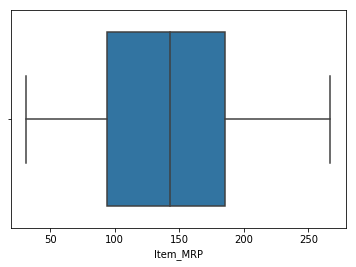

In [42]:
sns.boxplot(data.Item_MRP)
plt.show()

### Checking for outliers in the Item_Visibility

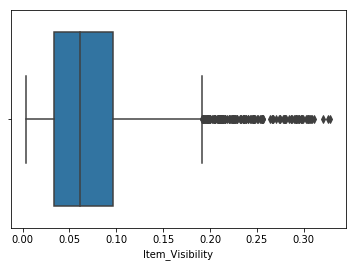

In [43]:
sns.boxplot(data.Item_Visibility)
plt.show()

In [0]:
q1, q3 = np.percentile(data.Item_Visibility, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [45]:
lower_bound, upper_bound

(-0.06190515649999999, 0.19140284349999998)

In [46]:
len(data[data["Item_Visibility"] > upper_bound]) / len(data)
# TODO: Do we need to remove the 2% outliers here?

0.018186084711955885

In [47]:
q1, q3 = np.percentile(data.Item_Weight, [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
lower_bound, upper_bound

(-0.7249999999999996, 26.035)

In [92]:
data[data.Item_Weight < lower_bound]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


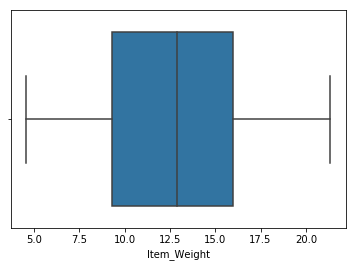

In [49]:
sns.boxplot(data.Item_Weight)
plt.show()

In [50]:
pandas_profiling.ProfileReport(data)

Number of variables,12
Number of observations,8523
Total Missing (%),2.4%
Total size in memory,799.1 KiB
Average record size in memory,96.0 B
Numeric,5
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,0


We're removing the **Outlet_Size** column, because this column has missing values and maybe it's not so important. However, later we can try to fit model including this variable to see the accuracy difference.

In [0]:
cleaned_data = data.copy()

In [0]:
cleaned_data.drop(columns = ["Outlet_Size", "Item_Identifier", "Outlet_Identifier"], inplace = True)

In [53]:
cleaned_data = pd.get_dummies(cleaned_data, drop_first = True)
cleaned_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,19.20,0.115029,182.0950,1998,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8.93,0.058267,53.8614,1987,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [54]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
Item_Weight                        8523 non-null float64
Item_Visibility                    8523 non-null float64
Item_MRP                           8523 non-null float64
Outlet_Establishment_Year          8523 non-null int64
Item_Outlet_Sales                  8523 non-null float64
Item_Fat_Content_Regular           8523 non-null uint8
Item_Type_Breads                   8523 non-null uint8
Item_Type_Breakfast                8523 non-null uint8
Item_Type_Canned                   8523 non-null uint8
Item_Type_Dairy                    8523 non-null uint8
Item_Type_Frozen Foods             8523 non-null uint8
Item_Type_Fruits and Vegetables    8523 non-null uint8
Item_Type_Hard Drinks              8523 non-null uint8
Item_Type_Health and Hygiene       8523 non-null uint8
Item_Type_Household                8523 non-null uint8
Item_Type_Meat                     8523 non-null uint8
Item_

In [0]:
cleaned_data["Outlet_Years"] = 2013 - cleaned_data.Outlet_Establishment_Year

In [0]:
cleaned_data.drop(columns = "Outlet_Establishment_Year", inplace = True)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = cleaned_data.drop(columns = "Item_Outlet_Sales")
y = cleaned_data.Item_Outlet_Sales

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6392, 25)
(6392,)
(2131, 25)
(2131,)


In [0]:
from sklearn.preprocessing import StandardScaler

In [61]:
X_scaler = StandardScaler()
X_train[X_train.columns] = X_scaler.fit_transform(X_train)
X_test[X_test.columns] = X_scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [62]:
print(X_train.shape)
print(X_test.shape)

(6392, 25)
(2131, 25)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [0]:
import statsmodels.api as sm

In [0]:
# This column corresponds to this X0 = 1, associated to this constant b0 in the multiple linear regression equation
# y = b0x0 + b1x1 + b2x2 + bnxn
# This is required by the "statsmodels" library
# X = np.append(arr = np.ones((X.shape[0], 1)).astype(int), values = X, axis = 1)

In [0]:
X.insert(loc = 0, column = "constant", value = np.ones((X.shape[0], 1)).astype(int))

In [0]:
regressor_OLS = sm.OLS(endog = y, exog = X).fit()

In [68]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     437.3
Date:                Tue, 23 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:10:00   Log-Likelihood:                -71999.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8497   BIC:                         1.442e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
constant                        -1744.3181    101.601    -17.168      0.000   -1943.480   -1545.156
Item_Weight                        -0.1688      2.922     -0.058      0.954      -5.896       5.558
Item_Visibility                  -217.5787    265.760     -0.819      0.413    -738.533     303.376
Item_MRP                           15.5649      0.198     78.658      0.000      15.177      15.953
Item_Fat_Content_Regular           40.2437     28.262      1.424      0.155     -15.157      95.645
Item_Type_Breads                    2.9586     84.143      0.035      0.972    -161.983     167.900
Item_Type_Breakfast                 8.6702    116.712      0.074      0.941    -220.114     237.454
Item_Type_Canned                   26.0103     62.833      0.414      0.679     -97.157     149.178
Item_Type_Dairy                   -39.9696     62.318     -0.641      0.521    -162.129      82.190
Item_Type_Frozen Foods            -26.3973     58.939     -0.448      0.654    -141.931      89.137
Item_Type_Fruits and Vegetables    29.3516     55.033      0.533      0.594     -78.526     137.229
Item_Type_Hard Drinks              -1.8307     90.273     -0.020      0.984    -178.787     175.126
Item_Type_Health and Hygiene      -10.3392     68.119     -0.152      0.879    -143.870     123.191
Item_Type_Household               -39.4030     60.022     -0.656      0.512    -157.061      78.255
Item_Type_Meat                      1.9048     70.748      0.027      0.979    -136.778     140.588
Item_Type_Others                  -24.1032     98.767     -0.244      0.807    -217.711     169.504
Item_Type_Seafood                 182.8614    148.156      1.234      0.217    -107.561     473.284
Item_Type_Snack Foods              -9.8802     55.314     -0.179      0.858    -118.310      98.549
Item_Type_Soft Drinks             -26.4347     70.247     -0.376      0.707    -164.137     111.267
Item_Type_Starchy Foods            24.3084    103.170      0.236      0.814    -177.929     226.546
Outlet_Location_Type_Tier 2       -21.8532     43.362     -0.504      0.614    -106.853      63.147
Outlet_Location_Type_Tier 3        -3.9416     39.753     -0.099      0.921     -81.867      73.983
Outlet_Type_Supermarket Type1    1932.7775     43.365     44.570      0.000    1847.772    2017.783
Outlet_Type_Supermarket Type2    1560.6901     82.733     18.864      0.000    1398.513    1722.867
Outlet_Type_Supermarket Type3    3376.8500     57.429     58.801      0.000    3264.276    3489.424
Outlet_Years                       -3.7159      3.236     -1.148      0.251     -10.059       2.627
==============================================================================
Omnibus:                      962.276   Durbin-Watson:                   2.002
Prob(Omnibus):           

In [0]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [70]:
data.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [71]:
regressor_OLS.pvalues.sort_values(ascending = False)

Item_Type_Hard Drinks             0.98382
Item_Type_Meat                    0.97852
Item_Type_Breads                  0.97195
Item_Weight                       0.95393
Item_Type_Breakfast               0.94078
Outlet_Location_Type_Tier 3       0.92102
Item_Type_Health and Hygiene      0.87936
Item_Type_Snack Foods             0.85824
Item_Type_Starchy Foods           0.81374
Item_Type_Others                  0.80721
Item_Type_Soft Drinks             0.70670
Item_Type_Canned                  0.67891
Item_Type_Frozen Foods            0.65425
Outlet_Location_Type_Tier 2       0.61429
Item_Type_Fruits and Vegetables   0.59381
Item_Type_Dairy                   0.52130
Item_Type_Household               0.51154
Item_Visibility                   0.41298
Outlet_Years                      0.25087
Item_Type_Seafood                 0.21714
Item_Fat_Content_Regular          0.15450
constant                          0.00000
Outlet_Type_Supermarket Type2     0.00000
Outlet_Type_Supermarket Type3     

In [72]:
def backward_elimination(features, labels, significance_level = 0.05):
    features_length = len(features_optimal.columns)
    for i in range(0, features_length):
        regressor_OLS = sm.OLS(labels, features).fit()
        max_pvalue = max(regressor_OLS.pvalues)
        if max_pvalue > significance_level:
            for j in range(0, features_length - i):
                if (regressor_OLS.pvalues[j].astype(float) == max_pvalue):
                    features.drop(features.columns[j], axis = 1, inplace = True)
    regressor_OLS.summary()
    return features
 


SL = 0.05
features_optimal = X.copy()
best_features = backward_elimination(features_optimal, y, SL)
best_features.head()

,constant,Item_MRP,Item_Fat_Content_Regular,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,249.80920,0,1,0,0
1,1,48.26920,1,0,1,0
2,1,141.61800,0,1,0,0
3,1,182.09500,1,0,0,0
4,1,53.86140,0,1,0,0


In [73]:
regressor_OLS = sm.OLS(endog = y, exog = best_features).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     2188.
Date:                Tue, 23 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:10:01   Log-Likelihood:                -72003.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8517   BIC:                         1.441e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
constant                      -1860.7997     44.882    -41.460      0.000   -1948.779   -1772.820
Item_MRP                         15.5593      0.196     79.196      0.000      15.174      15.944
Item_Fat_Content_Regular         50.8447     25.604      1.986      0.047       0.655     101.035
Outlet_Type_Supermarket Type1  1961.8549     37.504     52.311      0.000    1888.338    2035.371
Outlet_Type_Supermarket Type2  1633.8029     50.521     32.339      0.000    1534.769    1732.837
Outlet_Type_Supermarket Type3  3361.6803     50.418     66.676      0.000    3262.848    3460.513
==============================================================================
Omnibus:                      962.316   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2299.500
Skew:                           0.668   Prob(JB):                         0.00
Kurtosis:                       5.166   Cond. No.                         951.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
from sklearn.metrics import make_scorer
import sklearn.metrics as metrics

In [0]:
def perform_cross_validation(model_instance, X_train, y_train, X_test, y_test, cv = 10, scoring = make_scorer(metrics.mean_squared_error)):
    model = model_instance()
    model.fit(X_train, y_train)
    mse_train_values = cross_val_score(model, X_train, y_train, cv = cv, scoring = scoring)
    rmse_train_values = np.sqrt(mse_train_values)
    
    test_predictions = model.predict(X_test)
    mse_test_value = metrics.mean_squared_error(y_test, test_predictions)
    rmse_test_value = np.sqrt(mse_test_value)
    
    return rmse_train_values, rmse_test_value, model

In [0]:
def print_rmse_results(model_name, rmse_values, rmse_test_value):
    print(model_name + " rmse values mean:", rmse_values.mean())
    print(model_name + " rmse values std:", rmse_values.std())
    print(model_name + " rmse values min:", rmse_values.min())
    print(model_name + " rmse values max:", rmse_values.max())
    print()
    print(model_name + " rmse test set value:", rmse_test_value)

### Linear Regression

In [77]:
linreg_train_rmses, linreg_test_rmse, linreg_regressor = perform_cross_validation(LinearRegression, X_train, y_train, X_test, y_test)
print_rmse_results("Linear Regression", linreg_train_rmses, linreg_test_rmse)

Linear Regression rmse values mean: 1144.9193190996762
Linear Regression rmse values std: 45.8693180392244
Linear Regression rmse values min: 1074.3635805369374
Linear Regression rmse values max: 1218.3377851891328

Linear Regression rmse test set value: 1094.2738562101317


### Ridge

In [0]:
from sklearn.linear_model import Ridge, Lasso

In [79]:
ridge_train_rmses, ridge_test_rmse, ridge_regressor = perform_cross_validation(Ridge, X_train, y_train, X_test, y_test)
print_rmse_results("Ridge", ridge_train_rmses, ridge_test_rmse)

Ridge rmse values mean: 1144.9180933455095
Ridge rmse values std: 45.86805771222508
Ridge rmse values min: 1074.3582556570286
Ridge rmse values max: 1218.3273546410794

Ridge rmse test set value: 1094.258427795661


#### Ridge - Important Features Only

In [0]:
best_features_columns = list(best_features.columns.values[1:])
X_train_best = X_train[best_features_columns]
X_test_best = X_test[best_features_columns]

In [81]:
ridge_train_rmses, ridge_test_rmse, ridge_regressor = perform_cross_validation(Ridge, X_train_best, y_train, \
                                                                              X_test_best, y_test)
print_rmse_results("Ridge", ridge_train_rmses, ridge_test_rmse)

Ridge rmse values mean: 1141.9140224720031
Ridge rmse values std: 46.79407052961046
Ridge rmse values min: 1073.0374244177972
Ridge rmse values max: 1216.0936538396757

Ridge rmse test set value: 1090.6491584646733


### Lasso

In [82]:
lasso_train_rmses, lasso_test_rmse, lasso_regressor = perform_cross_validation(Lasso, X_train, y_train, \
                                                                              X_test, y_test)
print_rmse_results("Lasso", lasso_train_rmses, lasso_test_rmse)

Lasso rmse values mean: 1144.5511995772363
Lasso rmse values std: 45.961200535450864
Lasso rmse values min: 1073.9193877825478
Lasso rmse values max: 1218.0525007454323

Lasso rmse test set value: 1093.852516188522


In [83]:
lasso_regressor.coef_

array([-6.47054196e+00, -1.39581043e+01,  9.83309503e+02,  2.84007102e+01,
       -3.90860052e+00,  4.04799998e+00,  5.99369683e+00, -2.80303647e+01,
       -0.00000000e+00,  1.48281726e+01,  4.81896385e-01,  5.34253184e+00,
        0.00000000e+00, -8.95259032e-01, -3.57218195e+00,  2.48681369e+01,
       -6.25451975e+00, -8.50956039e+00,  5.25326462e+00, -0.00000000e+00,
        6.47000445e+00,  9.30000306e+02,  5.07263724e+02,  1.05865849e+03,
       -4.95079879e+00])

### XGBoost

In [0]:
import xgboost as xgb

In [85]:
xgb_regressor = xgb.XGBRegressor(objective = "reg:linear", colsample_bytree = 0.3, learning_rate = 0.1, 
                                 max_depth = 5, alpha = 10, n_estimators = 10)
xgb_regressor.fit(X_train, y_train)

[12:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [86]:
predictions = xgb_regressor.predict(X_test)
predictions

array([1360.9047, 1258.7404, 1297.5348, ..., 1691.796 , 1418.0938,
       1457.7252], dtype=float32)

In [87]:
mse_test_value = metrics.mean_squared_error(y_test, predictions)
rmse_test_value = np.sqrt(mse_test_value)
rmse_test_value

1648.9698508967715

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [111]:
list(range(1, 100, 5))

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]

In [0]:
%%capture

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    "n_estimators": range(5, 50, 5),
    "max_depth": range(2, 11),
    "learning_rate": np.arange(0.001, 1, 0.05),
    "reg_alpha": range(1, 100, 10)
    # TODO: reg_lambda
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator = gbm, param_distributions = gbm_param_grid, 
                                    scoring = "neg_mean_squared_error", n_iter = 200, cv = 5, verbose = 1)

# Fit randomized_mse to the data
randomized_mse.fit(X_train, y_train)

In [122]:
# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Best parameters found:  {'reg_alpha': 21, 'n_estimators': 45, 'max_depth': 4, 'learning_rate': 0.101}
Lowest RMSE found:  1094.4016354114153


In [125]:
test_predictions = randomized_mse.best_estimator_.predict(X_test)
mse_test_value = metrics.mean_squared_error(y_test, test_predictions)
rmse_test_value = np.sqrt(mse_test_value)
rmse_test_value

1052.1338706158392

# TODOs
* Try to use the **XGBoost model**
    * https://www.datacamp.com/community/tutorials/xgboost-in-python
    * https://github.com/dmlc/xgboost/tree/master/demo/guide-python
    * https://xgboost.readthedocs.io/en/latest/python/python_intro.html
    * https://www.youtube.com/playlist?list=PLZnYQQzkMilqTC12LmnN4WpQexB9raKQG
* Try to use simple models like Decision Tree, Random Forest, SVM
* Add the notes for each cell. Explain what we're doing. Why we are making our decision and so on.
* Preprocess the data. Convert categorical features into dummy variables. Normalize the numeric features.
* Split the data into training and testing sets again.
* Fit some models (Linear Regression, LASSO, RIDGE)
* Compare our results with other results. Research for a similar work.
* Don't rewrite the original data

## Resources
* [How to Increase Sales Retail](https://www.vendhq.com/blog/how-to-increase-sales-retail/)